In [84]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
df = pd.read_csv('historic.csv')

In [87]:
df.head()

item_no    category      main_promotion  color  stars success_indicator
0   739157       Tunic             Catalog  Green    3.1              flop
1   591846      Hoodie  Category_Highlight    Red    1.5              flop
2   337574  Sweatshirt             Catalog    Red    4.4               top
3   401933  Polo-Shirt  Category_Highlight   Blue    3.1              flop
4   812151      Hoodie  Category_Highlight  Green    4.1               top

In [88]:
df.isnull().value_counts()

item_no  category  main_promotion  color  stars  success_indicator
False    False     False           False  False  False                8000
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [90]:
df.duplicated().value_counts()

False    8000
dtype: int64

In [91]:
df['item_no'].describe()

count      8000.000000
mean     546474.338375
std      256513.463874
min      100171.000000
25%      325001.500000
50%      547081.000000
75%      764312.250000
max      989740.000000
Name: item_no, dtype: float64

In [92]:
df['item_no'].duplicated().value_counts()

False    8000
Name: item_no, dtype: int64

ITEM_NO DOES NOT HELP IN PREDICTION AND HENCE CAN BE DROPPED.

In [93]:
df = df[['category','main_promotion','color','stars','success_indicator']]

In [94]:
df.head()

category      main_promotion  color  stars success_indicator
0       Tunic             Catalog  Green    3.1              flop
1      Hoodie  Category_Highlight    Red    1.5              flop
2  Sweatshirt             Catalog    Red    4.4               top
3  Polo-Shirt  Category_Highlight   Blue    3.1              flop
4      Hoodie  Category_Highlight  Green    4.1               top

CATEGORY ANALYSIS

In [95]:
df['category'].value_counts()

Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64

In [96]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
encoded_category1 = le1.fit_transform(df['category'])
print(encoded_category1)

[5 1 3 ... 4 0 3]


In [97]:
df['category'] = encoded_category1

In [98]:
encoded_categories1 = le1.classes_
encoded_categories1

array(['Blouse', 'Hoodie', 'Polo-Shirt', 'Sweatshirt', 'T-Shirt', 'Tunic'],
      dtype=object)

In [99]:
encoded_values1 = le1.transform(encoded_categories1)
category_mapping1 = dict(zip(encoded_categories1, encoded_values1))
for category1, value1 in category_mapping1.items():
    print(f"Encoded Category: {category1}, Encoded Value: {value1}")

Encoded Category: Blouse, Encoded Value: 0
Encoded Category: Hoodie, Encoded Value: 1
Encoded Category: Polo-Shirt, Encoded Value: 2
Encoded Category: Sweatshirt, Encoded Value: 3
Encoded Category: T-Shirt, Encoded Value: 4
Encoded Category: Tunic, Encoded Value: 5


thus, categories are encoded to numbers instead of words.

In [100]:
pd.crosstab(df['category'], df['success_indicator'])


success_indicator  flop   top
category                     
0                   363   883
1                   258   481
2                   817   729
3                   453   907
4                   271  1188
5                   653   997

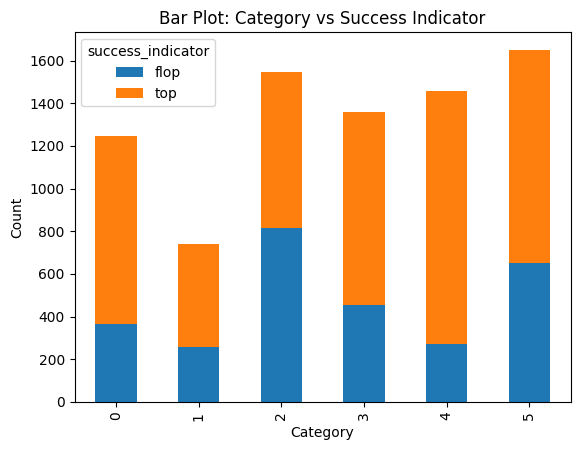

In [101]:

cross_tab = pd.crosstab(df['category'], df['success_indicator'])

cross_tab.plot.bar(stacked=True)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot: Category vs Success Indicator')
plt.show()

In [103]:
df[df['category'] == 0].shape
df[(df['category'] ==  0 ) & (df['success_indicator'] == 1)].shape


(0, 5)

In [22]:
df[df['category'] == 1].shape
df[(df['category'] ==  1 ) & (df['success_indicator'] == 1)].shape


(0, 5)

In [23]:
df[df['category'] == 2].shape
df[(df['category'] ==  2 ) & (df['success_indicator'] == 1)].shape


(0, 5)

In [24]:
df[df['category'] == 3].shape
df[(df['category'] ==  3 ) & (df['success_indicator'] == 1)].shape


(0, 5)

In [25]:
df[df['category'] == 4].shape
df[(df['category'] ==  4 ) & (df['success_indicator'] == 1)].shape


(0, 5)

In [26]:
df[df['category'] == 5].shape
df[(df['category'] ==  5 ) & (df['success_indicator'] == 1)].shape


(0, 5)

In [27]:
df['main_promotion'].value_counts()

Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
encoded_main_promotion = le2.fit_transform(df['main_promotion'])
print(encoded_main_promotion)

[0 1 0 ... 1 1 2]


In [29]:
df['main_promotion'] = encoded_main_promotion

In [30]:
encoded_categories_mp = le2.classes_
encoded_categories_mp

array(['Catalog', 'Category_Highlight', 'Display_Ad_Campaign',
       'Frontpage_Header'], dtype=object)

In [31]:
encoded_values2 = le2.transform(encoded_categories_mp)
category_mapping2 = dict(zip(encoded_categories_mp, encoded_values2))
for mp, value2 in category_mapping2.items():
    print(f"Encoded Category: {mp}, Encoded Value: {value2}")

Encoded Category: Catalog, Encoded Value: 0
Encoded Category: Category_Highlight, Encoded Value: 1
Encoded Category: Display_Ad_Campaign, Encoded Value: 2
Encoded Category: Frontpage_Header, Encoded Value: 3


In [32]:
cross_tab2 = pd.crosstab(df['main_promotion'], df['success_indicator'])
cross_tab2

success_indicator  flop   top
main_promotion               
0                   953  1293
1                   930  1502
2                   335   974
3                   597  1416

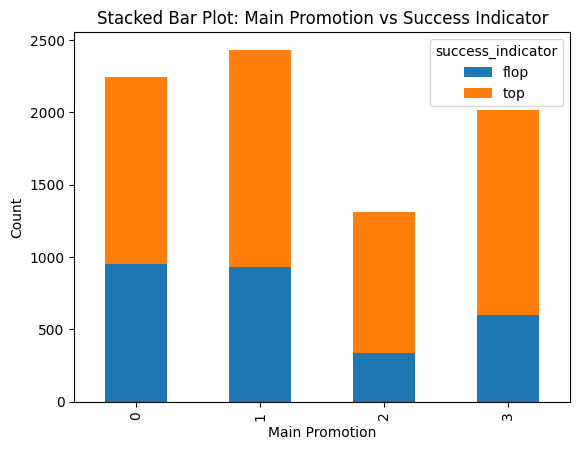

In [33]:
cross_tab2 = pd.crosstab(df['main_promotion'], df['success_indicator'])
cross_tab2.plot.bar(stacked=True)
plt.xlabel('Main Promotion')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Main Promotion vs Success Indicator')
plt.show()

In [34]:
df[df['main_promotion'] == 0].shape


(2246, 5)

In [104]:
df[df['main_promotion'] == 1].shape # 2432
df[(df['main_promotion'] ==  1 ) & (df['success_indicator'] == 1)].shape


(0, 5)

In [36]:
df[df['main_promotion'] == 2].shape # 1309
df[(df['main_promotion'] == 2  ) & (df['success_indicator'] == 1)].shape


(0, 5)

In [37]:
df[df['main_promotion'] == 3].shape # 2013
df[(df['main_promotion'] == 3  ) & (df['success_indicator'] == 1)].shape


(0, 5)

# Analysis on : color feature

In [38]:
df['color'].value_counts()

Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
le3 = LabelEncoder()
encoded_color = le3.fit_transform(df['color'])
print(encoded_color)

[3 7 7 ... 9 1 1]


In [40]:
df['color'] = encoded_color

In [41]:
encoded_color_class = le3.classes_
encoded_color_class

array(['Black', 'Blue', 'Brown', 'Green', 'Multi-Color', 'Orange', 'Pink',
       'Red', 'White', 'Yellow'], dtype=object)

In [42]:
encoded_values3 = le3.transform(encoded_color_class)
category_mapping3 = dict(zip(encoded_color_class, encoded_values3))
for color, value3 in category_mapping3.items():
    print(f"Encoded Category: {color}, Encoded Value: {value3}")

Encoded Category: Black, Encoded Value: 0
Encoded Category: Blue, Encoded Value: 1
Encoded Category: Brown, Encoded Value: 2
Encoded Category: Green, Encoded Value: 3
Encoded Category: Multi-Color, Encoded Value: 4
Encoded Category: Orange, Encoded Value: 5
Encoded Category: Pink, Encoded Value: 6
Encoded Category: Red, Encoded Value: 7
Encoded Category: White, Encoded Value: 8
Encoded Category: Yellow, Encoded Value: 9


In [43]:
df.head()

category  main_promotion  color  stars success_indicator
0         5               0      3    3.1              flop
1         1               1      7    1.5              flop
2         3               0      7    4.4               top
3         2               1      1    3.1              flop
4         1               1      3    4.1               top

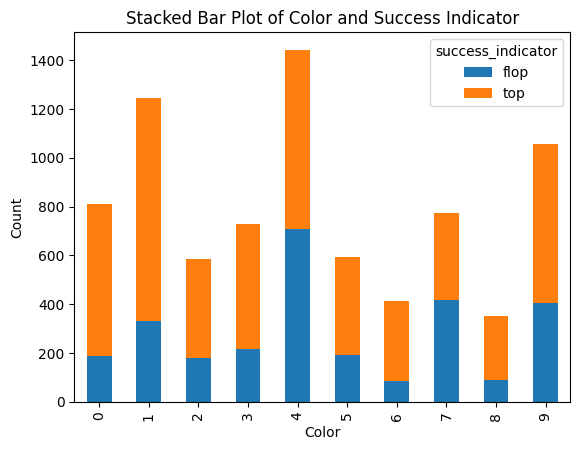

In [44]:
ct = pd.crosstab(df['color'], df['success_indicator'])
ct.plot(kind='bar', stacked=True)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Color and Success Indicator')
plt.show()

In [45]:
df[df['color'] == 0].shape # 812
df[(df['color'] == 0  ) & (df['success_indicator'] == 1)].shape


(0, 5)

In [46]:
df[df['color'] == 1].shape # 1244
df[(df['color'] == 1  ) & (df['success_indicator'] == 1)].shape


(0, 5)

In [47]:
df[df['color'] == 2].shape # 585
df[(df['color'] == 2  ) & (df['success_indicator'] == 1)].shape


(0, 5)

In [48]:
df[df['color'] == 3].shape # 728
df[(df['color'] == 3  ) & (df['success_indicator'] == 1)].shape #511


(0, 5)

In [49]:
df[df['color'] == 4].shape # 1443
df[(df['color'] == 4 ) & (df['success_indicator'] == 1)].shape #735


(0, 5)

In [50]:
df[df['color'] == 5].shape # 592
df[(df['color'] == 5 ) & (df['success_indicator'] == 1)].shape #402


(0, 5)

In [51]:
df[df['color'] == 6].shape # 412
df[(df['color'] == 6 ) & (df['success_indicator'] == 1)].shape #325


(0, 5)

In [52]:
df[df['color'] == 7].shape #776
df[(df['color'] == 7 ) & (df['success_indicator'] == 1)].shape #359


(0, 5)

In [53]:
df[df['color'] == 8].shape # 352
df[(df['color'] == 8 ) & (df['success_indicator'] == 1)].shape


(0, 5)

In [54]:
df[df['color'] == 9].shape # 1056
df[(df['color'] == 9 ) & (df['success_indicator'] == 1)].shape #649


(0, 5)

# Analysis on :  stars feature

Here based on domain knowledge or as per mentioned in pdf of this problem we can convert stars into two bins
1st bin will contain all stars <=3 and will be for class 'FLOP' will assign it digit 0
2nd bin will contain all stars >3 and will be for class 'TOP' and will assign it digit 1

In [56]:
df.info() #original datatype of stars column is object but for num condition we have to convert it into float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 312.6+ KB


In [57]:
# Change data type of "Stars" from object to float
df['stars'] = df['stars'].astype(float)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 312.6+ KB


In [59]:
df['stars'] = np.where(df['stars'] <= 3, 0, df['stars'])
#BIN 1st where star <=3 will assign them as 0 as most of them are 'FLOP'

In [60]:
df['stars'] = np.where(df['stars'] > 3, 1, df['stars'])
#BIN 2nd where star > 3 will assign them as 1 as most of them are 'TOP'

In [61]:
df['stars'].value_counts()

1.0    5278
0.0    2722
Name: stars, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 312.6+ KB


In [63]:
df.head()

category  main_promotion  color  stars success_indicator
0         5               0      3    1.0              flop
1         1               1      7    0.0              flop
2         3               0      7    1.0               top
3         2               1      1    1.0              flop
4         1               1      3    1.0               top

In [64]:
df[df['stars'] == 1].shape # 5278
df[(df['stars'] == 1 ) & (df['success_indicator'] == 1)].shape #4364
#when product star rating 1 is i.e more than 3 then percent of sucess indicator = TOP will be 82.68 %

(0, 5)

In [65]:
df[df['stars'] == 0].shape # 2722
df[(df['stars'] == 0  ) & (df['success_indicator'] == 1)].shape #821
#when product star rating  is 0 i.e less than eqaual to 3 then percent of sucess indicator = TOP will be 30 %

(0, 5)

# Analysis on :  success_indicator feature

In [67]:
df['success_indicator'].value_counts()

top     5185
flop    2815
Name: success_indicator, dtype: int64

In [68]:
encoder = LabelEncoder()
df['success_indicator'] = encoder.fit_transform(df['success_indicator'])

In [69]:
df['success_indicator'].value_counts() # will encoded new target column WHERE TOP = 1 and FLOP =0

1    5185
0    2815
Name: success_indicator, dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 312.6 KB


In [71]:
df.shape

(8000, 5)

# checking for Balancing and imbalancing of dataframe

In [73]:
df['success_indicator'].value_counts()

1    5185
0    2815
Name: success_indicator, dtype: int64

In [74]:
(2815/8000)*100

35.1875

In [75]:
(5185/8000)*100

64.8125

1 >> Hence data is imbalanced as data for 'FLOP' catagory / class is nearly half of 'TOP' class / category in Target  
     feature.
2 >> Problem with imbalaced data is that when we prepare model , our prediction will be biased towards class/category with
     majority of data i.e, 'TOP' in our case
3 >> we can choose various ways of balancing data ex, undersampling of majority class , oversampling of minority class ,
     or SMOTE technique

In [76]:
from imblearn.over_sampling import SMOTE
x = df.drop('success_indicator', axis=1)
y = df['success_indicator']

In [77]:
smote = SMOTE()
x_balanced, y_balanced = smote.fit_resample(x, y)
df_balanced = pd.concat([x_balanced, y_balanced], axis=1)
print(df_balanced)

       category  main_promotion  color  stars  success_indicator
0             5               0      3    1.0                  0
1             1               1      7    0.0                  0
2             3               0      7    1.0                  1
3             2               1      1    1.0                  0
4             1               1      3    1.0                  1
...         ...             ...    ...    ...                ...
10365         5               1      2    1.0                  0
10366         0               1      1    1.0                  0
10367         4               2      1    1.0                  0
10368         5               2      0    0.0                  0
10369         2               1      9    0.0                  0

[10370 rows x 5 columns]


In [78]:
df_balanced.head()

category  main_promotion  color  stars  success_indicator
0         5               0      3    1.0                  0
1         1               1      7    0.0                  0
2         3               0      7    1.0                  1
3         2               1      1    1.0                  0
4         1               1      3    1.0                  1

In [79]:
df_balanced.shape

(10370, 5)

In [80]:
df_balanced['success_indicator'].value_counts()

0    5185
1    5185
Name: success_indicator, dtype: int64

In [81]:
print(df_balanced.columns)


Index(['category', 'main_promotion', 'color', 'stars', 'success_indicator'], dtype='object')


# Hence Our DATA is balanced with all values encoded in numbers which is prerequisite for the data required for model building

In [82]:
df_balanced.to_csv('train_df.csv', index=False)

# Exploratory Data Analysis (EDA) Report:


Overview of the Dataset: The five variables in the dataset are "item_no," "Category," "Colour," "main_promotion," and "Success_Indicator."

Unvariate Analysis: Crucial Realisations

'item_no': We can remove this feature since it won't help us predict output either it has a significant variance or all of its values are unique.

"Category": The products are divided into 6 categories: blouse, hoodie, sweatshirt, t-shirt, and tunic. Here, as our model can only interpret numerical values, we must change the categorical features datatype into a numerical datatype via feature engineering.

"main_promotion": The corporation employed four primary methods to promote these products: Category Highlight, Catalogue, Frontpage Header, and Display Ad Campaign.

"Colour": The labels "Red," "Blue," and "Green," among others, stand for different colours. The items come in ten different colours, thus we also need to encode these attributes.

Success_Indicator: The labels 'TOP' and 'FLOP' stand for success indicators. 'success_indicator' will be our target feature with categories flop and top; therefore, we have to build binary classification models such as (logistic regression, SVM classifier, decision tree, Ensemble models ets) because the counts of 'TOP' and 'FLOP' are 5185 and 2815, respectively. This indicates that the data is incomplete.

Bivariate Analysis: Crucial Realities

Relationship between "item_no" and "Success_Indicator": Since "item_no" has a lot of data variation, we can look ahead and drop it. Therefore, there is no relationship between "item_no" and "Success_Indicator."

'main_promotion' and 'Success_Indicator' relationship: in this case, the success rate is 57% for Catalogue and 61% for Category Highlight. Display Ad Campaign 74% Frontpage_Header 70% Because of this, the company should prioritise Display_Ad_Campaign and Frontpage_Header promotions over the other two. For example, if the company promotes primarily through a catalogue, the percentage of success indicated will be 57.56%; if it promotes primarily through Category_Highlight, the percentage of success indicated will be 61.75%; if it promotes primarily through Display_Ad_Campaign, the percentage of success indicated will be 74.40%; and if it promotes via Frontpage_Header, the percentage of success indicator = TOP will be 70.34%. Thus, based on this data, launching a product with a display ad campaign as the primary marketing strategy will benefit businesses, since it has a 74% success rate.

The relationship between "colour" and "Success_Indicator" is as follows: if a product is black, the percent of success indicator (TOP) will be 76.72%; if it is blue, the percent of success indicator will be 73.31%; if it is green, the percent of success indicator will be 70.19%; if it is multi-colored, the percent of success indicator will be 50.93%; if it is orange, the percent of success indicator will be 67.90%; and if the product colour is pink, the relationship will be 67.90%. The success indicator percentage (TOP) will be 78.88%. The percentage of success signal = TOP when the product colour is red is 46.26%. If the product is white in colour, then 74.71% of the success indicator = TOP will be present. The percentage of success signal = TOP when the product colour is yellow is 61.45%. Therefore, introducing a product in pink, black, and white will be beneficial for business, according to this analysis.

'Stars' and 'Success_Indicator' are related: if a product has a star rating of 1, meaning that it has more stars than three, then the percentage of the success indicator, or TOP, will be 82.68%. A product with a star rating of zero, or fewer than three, will have a success indication percentage of thirty percent, meaning that a higher rating will be beneficial for product acceptance by customers.